How stable is the five planet Kepler-33 system? Let's test it out by placing a planet of varying mass outside the system and observing how the semi-major axis and eccentricity of the planets change after 2000 years. If the semi-major axis becomes negative, or if the eccentricity exceeds 0.99, we assert that a planet has been unbound from the system.

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400 # sharp looking plots
plt.rcParams['figure.figsize'] = 10, 6 # bigger plots
import rebound
import numpy as np
from matplotlib.lines import Line2D

First, we need to define a few variables and arrays.

In [2]:
Me_to_Msun = 3.00273e-6 # convert earth mass to solar mass
added_mass = np.array([0, Me_to_Msun, 0.001, 0.01]) # cases to check: No object, Earth, Jupiter, 10*Jupiter
tot_time = 2e3 # integrate for 2000 yrs
a_arr = [] # collect info later
e_arr = []

We want to run four simulations, one for each of the four objects.

In [3]:
for mass in added_mass:
    sim = rebound.Simulation() # create a REBOUND simulation
    sim.integrator = 'whfast' # change integrator to speed up runtime
    sim.units = ["AU", "Msun", "yr"] # desired units
    
    # add particles. 
    # Star mass from Petigura et al 2017
    # Planet mass and orbital info from NASA, Lissauer et al 2012, respectively
    sim.add(m=1.26) # Kepler-33 star
    sim.add(m=3.68*Me_to_Msun, a=0.06777, inc=np.radians(86.39)) # Kepler-33b
    sim.add(m=0.39*Me_to_Msun, a=0.1189, inc=np.radians(88.19)) # Kepler-33c
    sim.add(m=3.91*Me_to_Msun, a=0.1662, inc=np.radians(88.71)) # Kepler-33d
    sim.add(m=5.57*Me_to_Msun, a=0.2138, inc=np.radians(88.94)) # Kepler-33e
    sim.add(m=9.6*Me_to_Msun, a=0.2535, inc=np.radians(89.17)) # Kepler-33f
    sim.add(m=mass, a = 0.3) # Mass placed at 0.3 AU

    # Set the center of momentum to be at the origin
    sim.move_to_com()

    time_step = sim.particles[1].P / 100. # time steps should capture 100 steps of smallest orbit
    sim.dt = time_step # update sim time step

    a = np.zeros(len(sim.particles)-1) # orbital elements udefined for central object!
    e = np.zeros(len(sim.particles)-1)

    # integrate until tot_time
    sim.integrate(tot_time)
    # save each planet's semi-major axis and eccentricity
    for j in range(1, len(sim.particles)):
        a[j-1] = sim.particles[j].a
        e[j-1] = sim.particles[j].e
    a_arr.append(a)
    e_arr.append(e)

a_arr = np.array(a_arr, dtype=object)
e_arr = np.array(e_arr, dtype=object)

Let's take a look at the results.

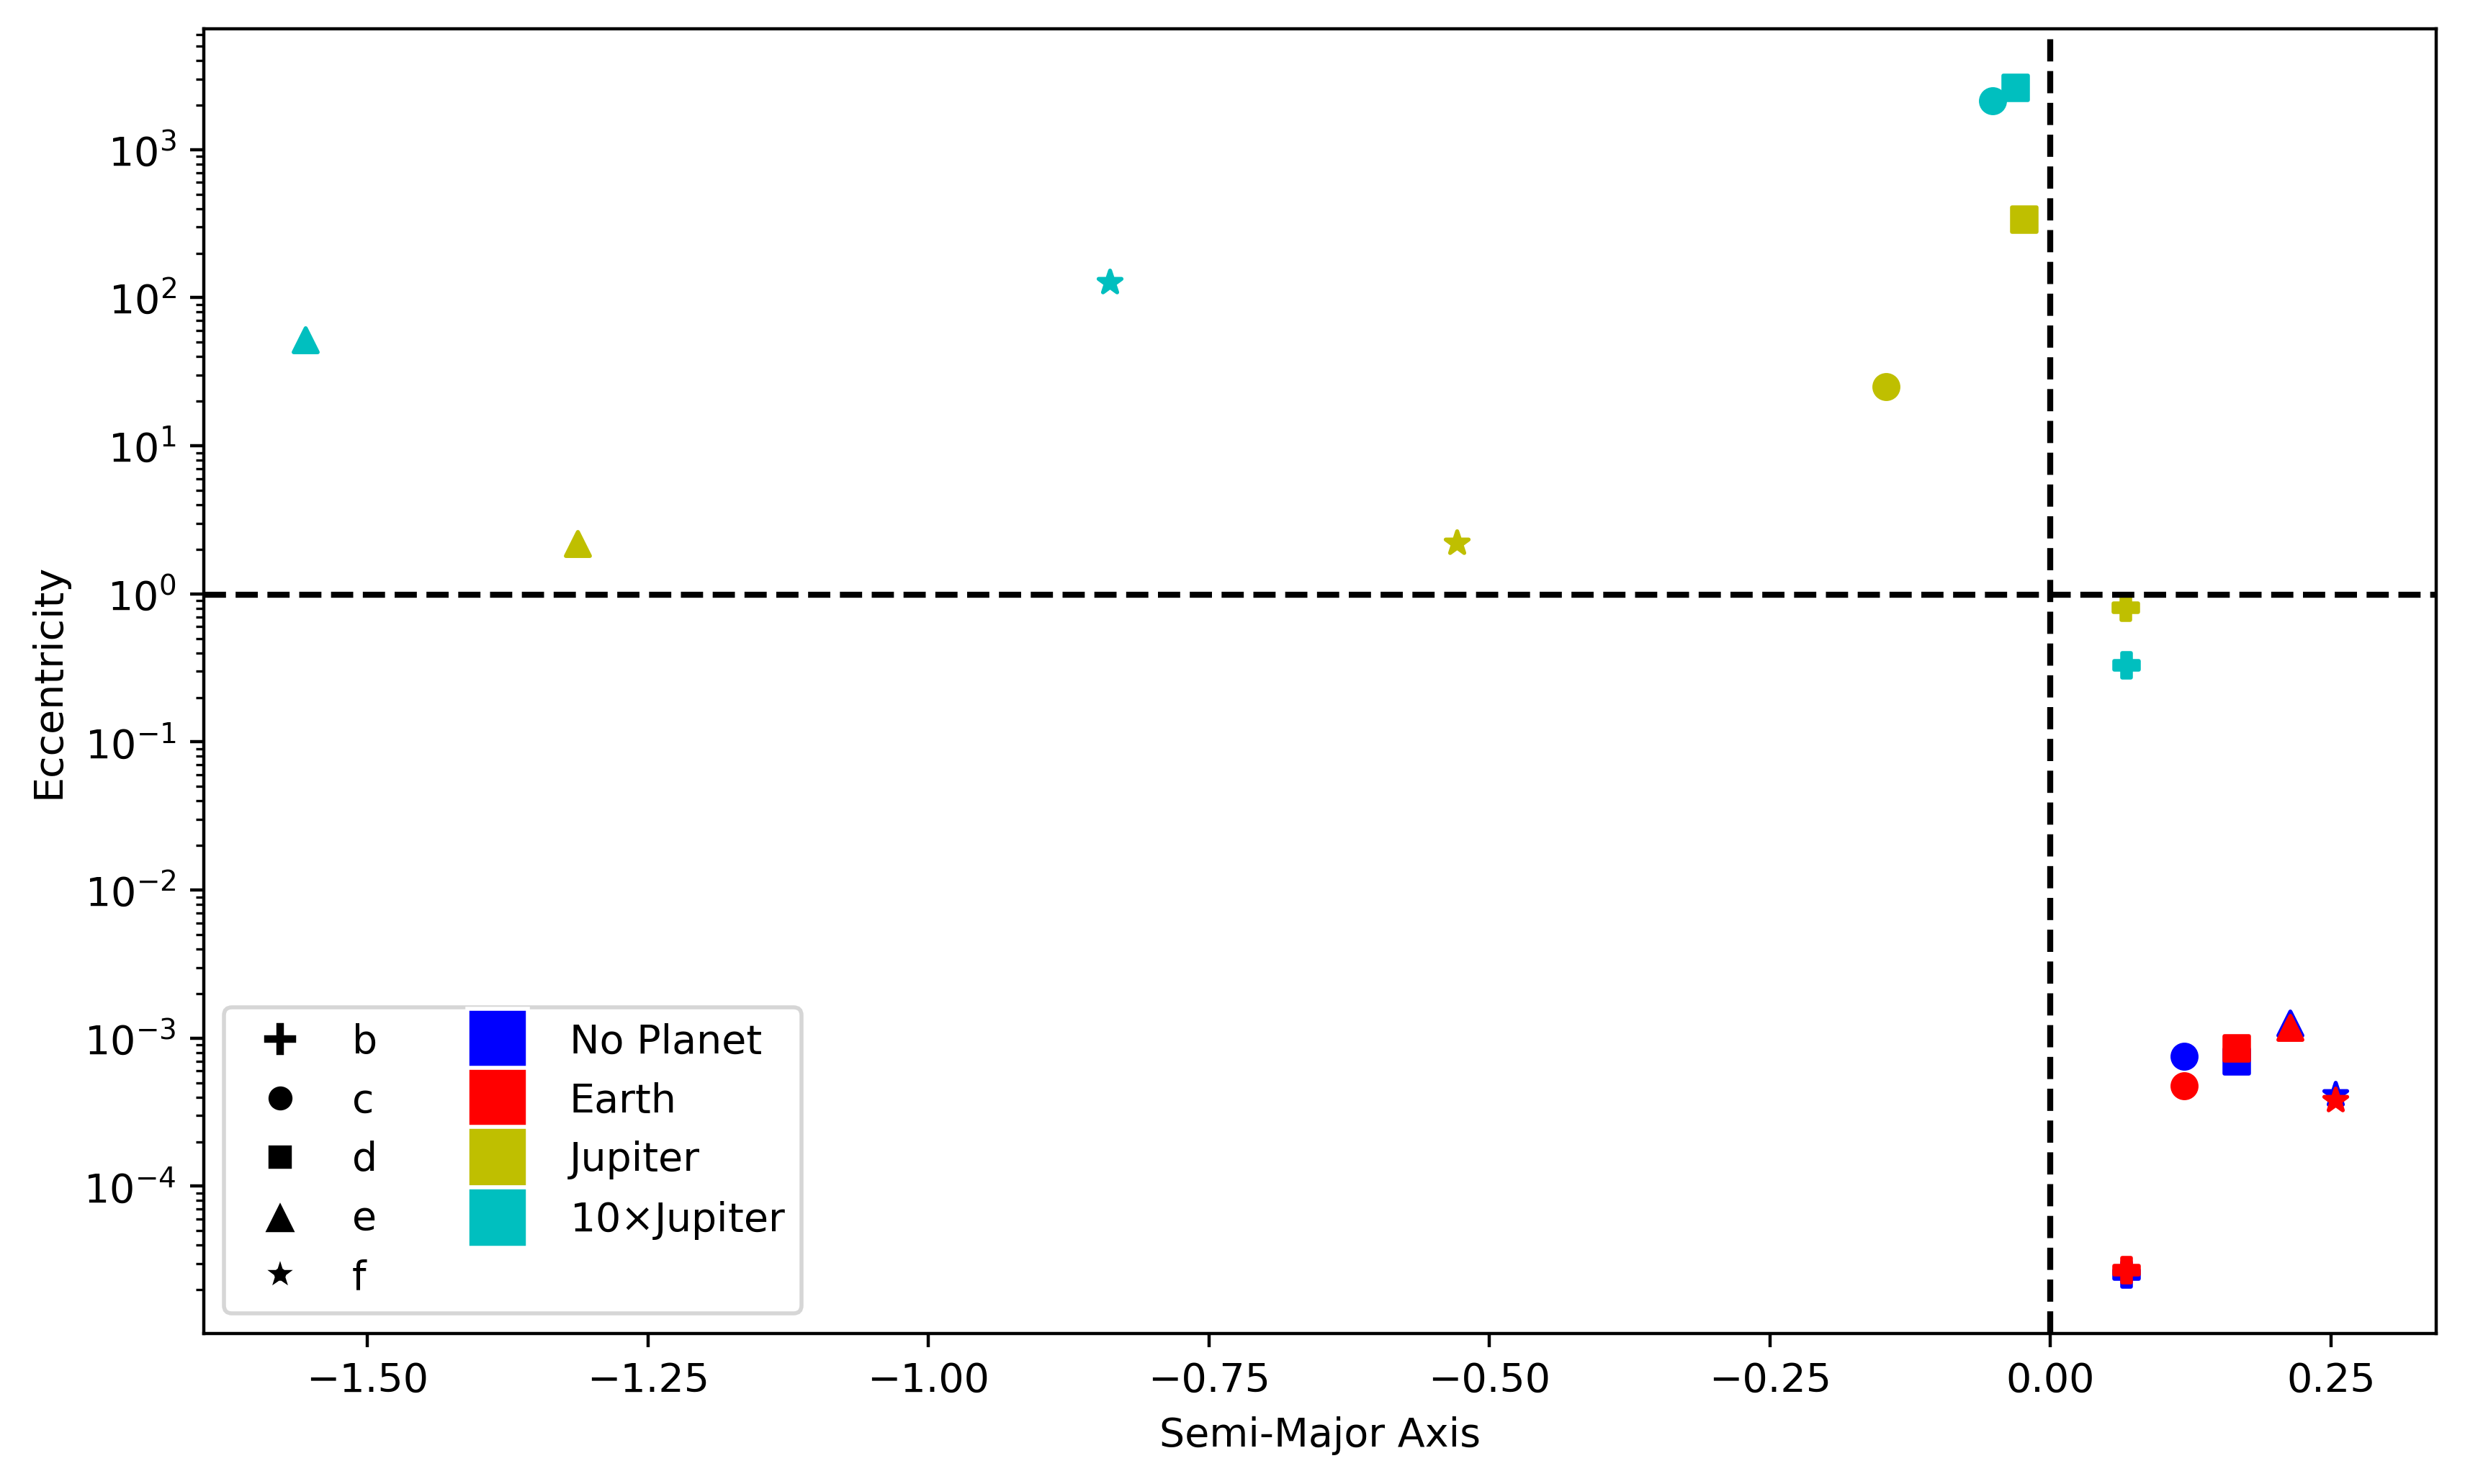

In [9]:
fig, ax = plt.subplots(1)

labels = ['b', 'c', 'd', 'e', 'f', 'No Planet', 'Earth', 'Jupiter', r'10$\times$Jupiter']
mass_colors = ['b', 'r', 'y', 'c']
planet_marker = ['P', 'o', 's', '^', '*']
for i in range(added_mass.shape[0]):
    for j in range(len(sim.particles)-2):
        ax.scatter(a_arr[i,j], e_arr[i,j], c=mass_colors[i], marker=planet_marker[j])
ax.set_xlabel('Semi-Major Axis')
ax.set_ylabel('Eccentricity')
ax.set_yscale('log')
ax.axhline(0.99, c='k', ls='--')
ax.axvline(0, c='k', ls='--')
handles = [Line2D([0], [0], marker='P', color='w', markerfacecolor='k', markersize=9),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=7),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=7),
           Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=9),
           Line2D([0], [0], marker='*', color='w', markerfacecolor='k', markersize=10),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='b', markersize=15),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='r', markersize=15),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='y', markersize=15),
           Line2D([0], [0], marker='s', color='w', markerfacecolor='c', markersize=15)]
ax.legend(handles=handles,
          labels=labels, ncol=2,loc='lower left')
# plt.legend(labels=['b', 'c', 'd', 'e', 'f'], loc=5)
plt.savefig('kepler33.png')

The system is stable when there is no planet or if the planet is only one Earth mass. For both the Jupiter and 10 $\times$ Jupiter masses, only Kepler-33b had its semi-major axis and eccentricity remain within stable values; every other planet is disrupted to the point of being ejected from the system.